In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('seaborn-v0_8')  # or 'default', 'ggplot', 'bmh', etc.

print("hello!")

hello!


In [2]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

The code below computes the cost by iterating through each example. For every iteration:

A prediction, f_wb, is generated.

The difference between the prediction and the target is found and then squared.

This squared difference is added to the running total cost.


In [26]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

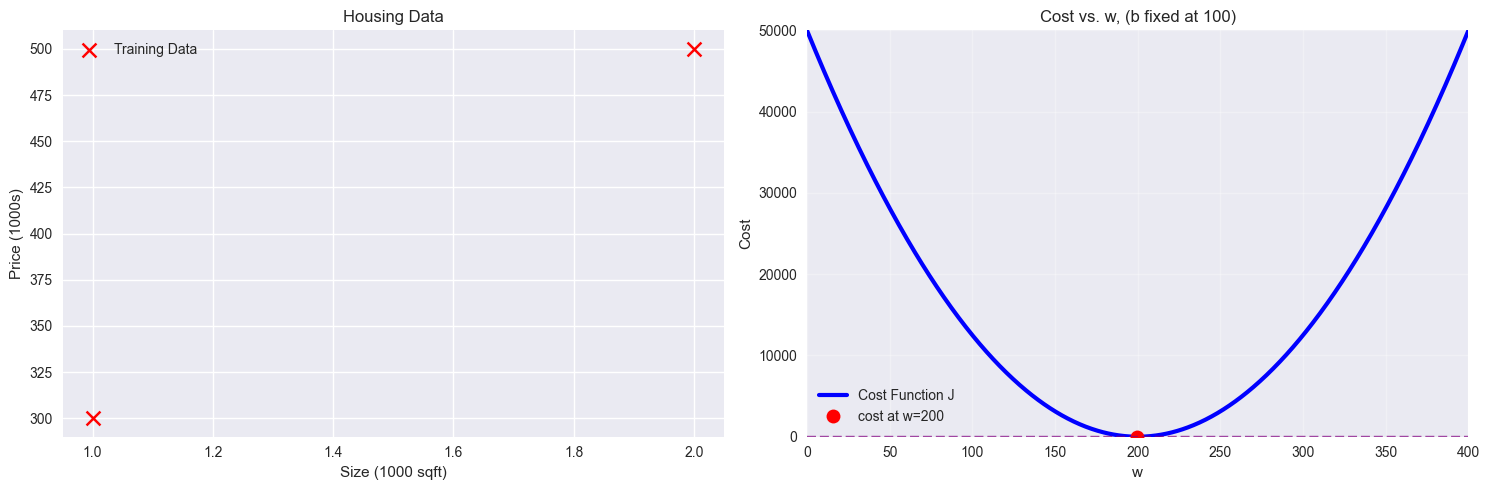

Minimum cost J = 0.05 at w = 200
Your data: x_train = [1. 2.], y_train = [300. 500.]
Model: Price = 200 × Size + 100


In [ ]:
def plt_intuition(x_train, y_train):
    """
    Plot training data and cost function J for the given data
    """
    # Create a range of w values for the cost function
    w_range = np.linspace(0, 400, 1000)  # Changed range to match your graph
    b = 100  # Changed from 0 to 100 to match your graph
    
    # Calculate cost function J for different w values using compute_cost
    J_values = []
    for w in w_range:
        J = compute_cost(x_train, y_train, w, b)
        J_values.append(J)
    
    J_values = np.array(J_values) # keeping all the J values in a np array for plotting
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot 1: Training data
    ax1.scatter(x_train, y_train, marker='x', c='r', s=100, label='Training Data')
    ax1.set_xlabel('Size (1000 sqft)')
    ax1.set_ylabel('Price (1000s)')
    ax1.set_title('Housing Data')
    ax1.legend()
    ax1.grid(True)
    
    # Plot 2: Cost function J - Updated to match your graph
    ax2.plot(w_range, J_values, 'b-', linewidth=3, label='Cost Function J')
    ax2.set_xlabel('w')
    ax2.set_ylabel('Cost')
    ax2.set_title('Cost vs. w, (b fixed at 100)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Set axis limits to match your graph
    ax2.set_xlim(0, 400)
    ax2.set_ylim(0, 50000)
    
    # Find and mark the minimum
    min_idx = np.argmin(J_values)
    min_w = w_range[min_idx]
    min_J = J_values[min_idx]
    ax2.plot(min_w, min_J, 'ro', markersize=10, label=f'cost at w={min_w:.0f}')
    
    # Add reference lines like in your graph
    ax2.axhline(y=0, color='purple', linestyle='--', alpha=0.7)
    ax2.axvline(x=min_w, ymin=0, ymax=min_J/50000, color='purple', linestyle='--', alpha=0.7)
    
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Minimum cost J = {min_J:.2f} at w = {min_w:.0f}")
    print(f"Your data: x_train = {x_train}, y_train = {y_train}")
    print(f"Model: Price = {min_w:.0f} × Size + {b}")

# Your specific data
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])       #(price in 1000s)

# Plot the data and cost function
plt_intuition(x_train, y_train)

 J = 1001.3717 is almost equal to J = 0.1 on the right plot above. (after scaling it will be equal J = 1001.3717).

Let's go for a larger data:

In [27]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

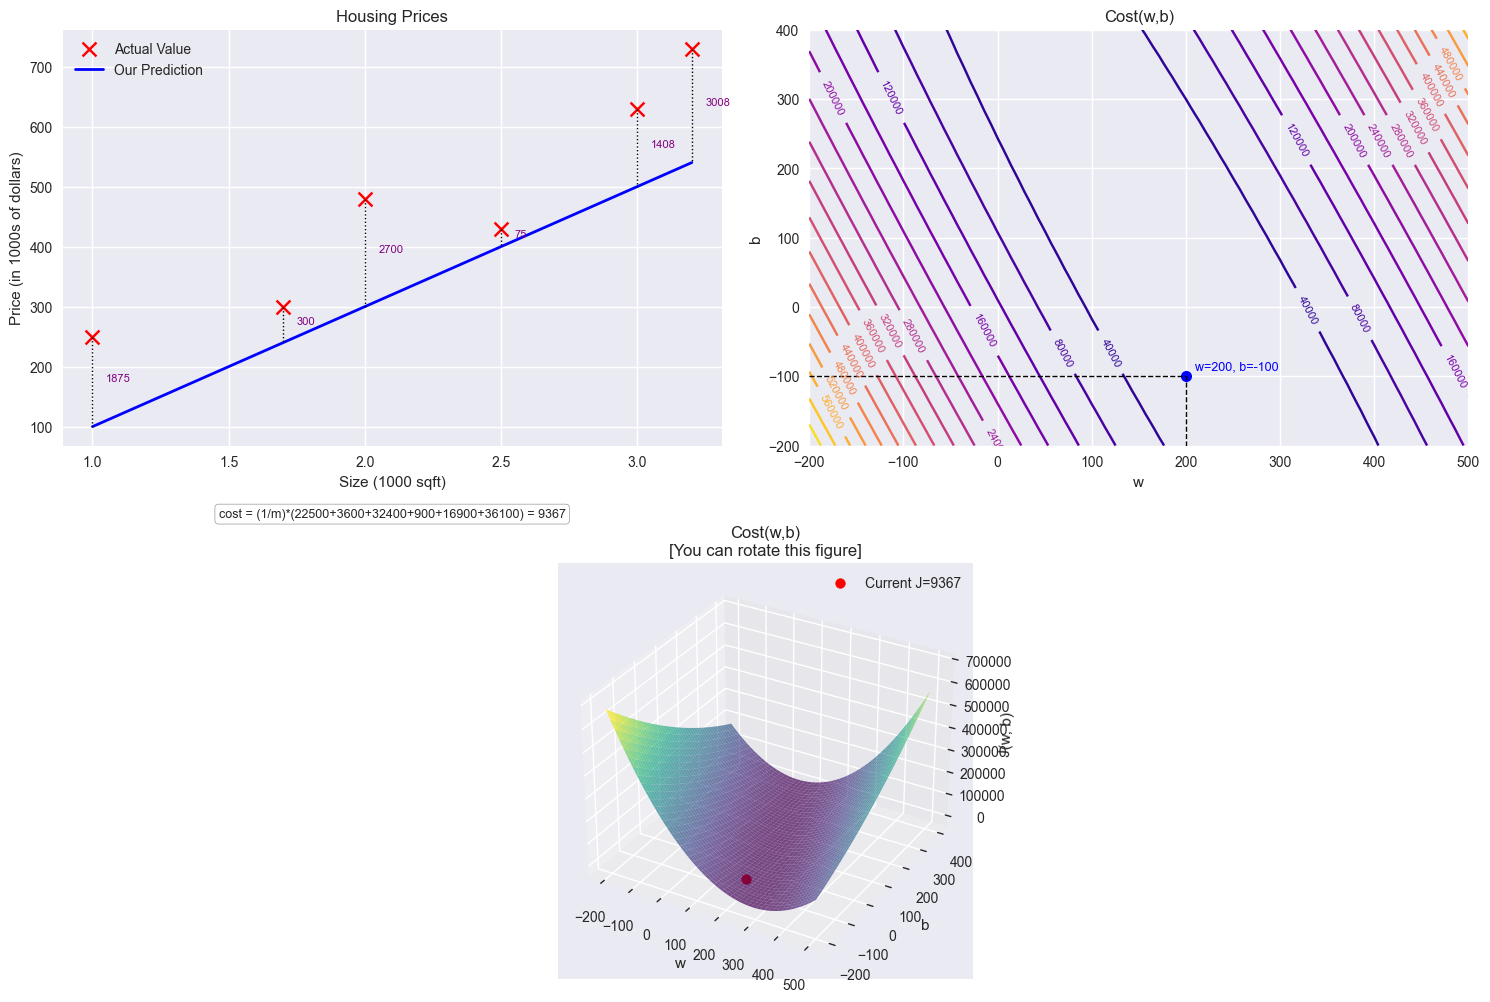

Data points: 6
House sizes: [1.  1.7 2.  2.5 3.  3.2]
House prices: [250 300 480 430 630 730]
Current w = 200, b = -100
Current cost J = 9366.67


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Your specific data
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

def compute_cost(x, y, w, b):
    """Computes the cost function for linear regression"""
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = (1 / (2 * m)) * cost
    return total_cost

def predict(x, w, b):
    return w * x + b

# Define ranges for w and b
w_values = np.linspace(-200, 500, 50)
b_values = np.linspace(-200, 400, 50)

# Create meshgrid
W, B = np.meshgrid(w_values, b_values)

# Calculate J(w,b) for each (w,b) pair
J_surface = np.zeros_like(W)
for i in range(len(w_values)):
    for j in range(len(b_values)):
        J_surface[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])

# Create figure with subplots
fig = plt.figure(figsize=(15, 10))

# Subplot positions
ax_housing = plt.subplot(2, 2, 1)  # Top left - Housing prices
ax_contour = plt.subplot(2, 2, 2)  # Top right - Contour plot
ax_surface = plt.subplot(2, 2, (3, 4), projection='3d')  # Bottom - 3D surface

# Fixed values for demonstration
w = 200
b = -100

# 1. Housing Prices Plot
ax_housing.scatter(x_train, y_train, marker='x', c='r', s=100, label='Actual Value')

# Plot prediction line
x_line = np.array([x_train.min(), x_train.max()])
y_line = predict(x_line, w, b)
ax_housing.plot(x_line, y_line, 'b-', linewidth=2, label='Our Prediction')

# Plot residuals (cost for each point)
total_cost_sum = 0
for i in range(len(x_train)):
    y_pred_i = predict(x_train[i], w, b)
    cost_i = (y_pred_i - y_train[i])**2 / (2 * len(x_train))
    ax_housing.plot([x_train[i], x_train[i]], [y_train[i], y_pred_i], 'k:', linewidth=1)
    ax_housing.text(x_train[i] + 0.05, (y_train[i] + y_pred_i) / 2, f'{cost_i:.0f}', 
                   color='purple', fontsize=8)
    total_cost_sum += (y_pred_i - y_train[i])**2

# Display total cost
total_cost_val = (1 / (2 * len(x_train))) * total_cost_sum
cost_text = f'cost = (1/m)*({"+".join([f"{((predict(x_train[i], w, b) - y_train[i])**2):.0f}" for i in range(len(x_train))])}) = {total_cost_val:.0f}'
ax_housing.text(0.5, -0.15, cost_text, transform=ax_housing.transAxes, 
               fontsize=9, ha='center', va='top', 
               bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5, alpha=0.8))

ax_housing.set_xlabel('Size (1000 sqft)')
ax_housing.set_ylabel('Price (in 1000s of dollars)')
ax_housing.set_title('Housing Prices')
ax_housing.legend()
ax_housing.grid(True)

# 2. Contour Plot
contour = ax_contour.contour(W, B, J_surface, levels=20, cmap='plasma')
ax_contour.clabel(contour, inline=True, fontsize=8)

# Plot current point
ax_contour.plot(w, b, 'o', color='blue', markersize=8)
ax_contour.plot([w, w], [B.min(), b], 'k--', linewidth=1)
ax_contour.plot([W.min(), w], [b, b], 'k--', linewidth=1)
ax_contour.text(w + 10, b + 10, f'w={w:.0f}, b={b:.0f}', color='blue', fontsize=9)

ax_contour.set_xlabel('w')
ax_contour.set_ylabel('b')
ax_contour.set_title('Cost(w,b)')
ax_contour.grid(True)

# 3. 3D Surface Plot
surf = ax_surface.plot_surface(W, B, J_surface, cmap='viridis', alpha=0.7)

# Mark current point
current_J = compute_cost(x_train, y_train, w, b)
ax_surface.scatter(w, b, current_J, color='red', s=50, label=f'Current J={current_J:.0f}')

ax_surface.set_xlabel('w')
ax_surface.set_ylabel('b')
ax_surface.set_zlabel('J(w, b)')
ax_surface.set_title('Cost(w,b)\n[You can rotate this figure]')
ax_surface.legend()

plt.tight_layout()
plt.show()

# Print some information
print(f"Data points: {len(x_train)}")
print(f"House sizes: {x_train}")
print(f"House prices: {y_train}")
print(f"Current w = {w}, b = {b}")
print(f"Current cost J = {current_J:.2f}")

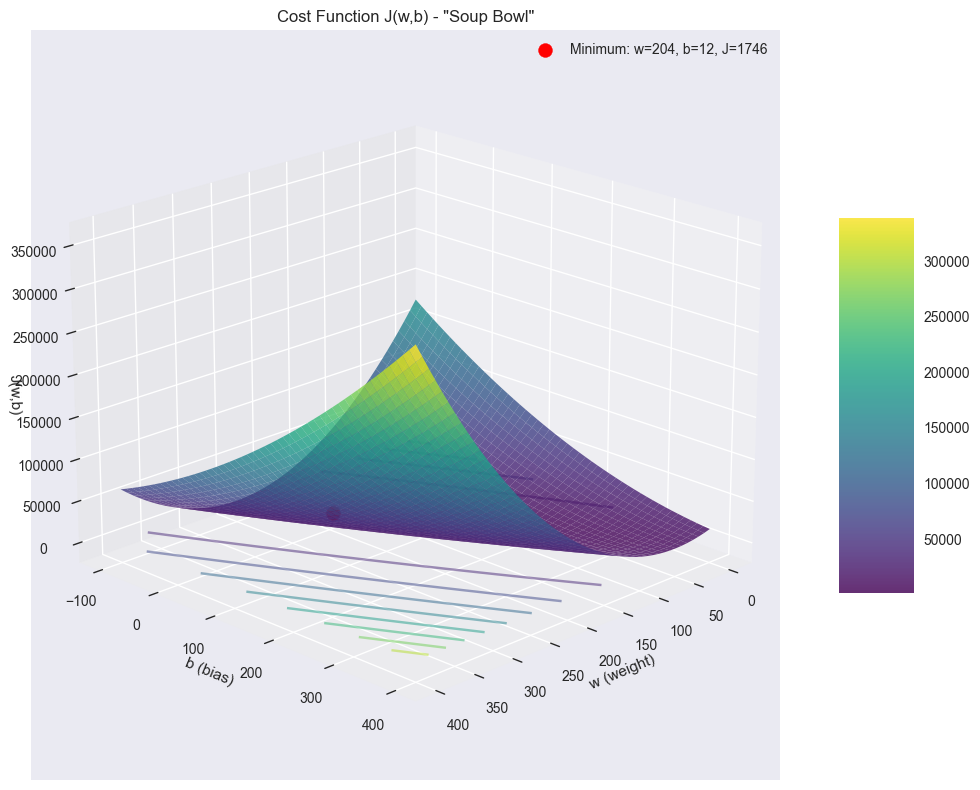

Minimum cost J = 1745.86 at w = 204, b = 12


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def soup_bowl(x_train, y_train):
    """
    Creates a 3D 'soup bowl' visualization of the cost function J(w,b)
    """
    # Define ranges for w and b
    w_values = np.linspace(0, 400, 50)
    b_values = np.linspace(-100, 400, 50)
    
    # Create meshgrid
    W, B = np.meshgrid(w_values, b_values)
    
    # Calculate J(w,b) for each (w,b) pair
    J_surface = np.zeros_like(W)
    for i in range(len(w_values)):
        for j in range(len(b_values)):
            J_surface[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])
    
    # Create 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface (the "soup bowl")
    surf = ax.plot_surface(W, B, J_surface, cmap='viridis', alpha=0.8, 
                          linewidth=0, antialiased=True)
    
    # Add contour lines on the bottom
    ax.contour(W, B, J_surface, zdir='z', offset=J_surface.min(), 
               cmap='viridis', alpha=0.5, levels=10)
    
    # Find and mark the minimum point
    min_idx = np.unravel_index(np.argmin(J_surface), J_surface.shape)
    min_w = W[min_idx]
    min_b = B[min_idx]
    min_J = J_surface[min_idx]
    
    # Mark the minimum with a red dot
    ax.scatter(min_w, min_b, min_J, color='red', s=100, 
               label=f'Minimum: w={min_w:.0f}, b={min_b:.0f}, J={min_J:.0f}')
    
    # Set labels and title
    ax.set_xlabel('w (weight)')
    ax.set_ylabel('b (bias)')
    ax.set_zlabel('J(w,b)')
    ax.set_title('Cost Function J(w,b) - "Soup Bowl"')
    ax.legend()
    
    # Add some styling
    ax.view_init(elev=20, azim=45)  # Set viewing angle
    
    # Add colorbar
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Minimum cost J = {min_J:.2f} at w = {min_w:.0f}, b = {min_b:.0f}")

# Your data
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

# Call the soup_bowl function
soup_bowl(x_train, y_train)